# NLP Project

### Importing required libraries

In [1]:
import nltk
# nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
# nltk.download('universal_tagset')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jatin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jatin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jatin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\jatin\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\jatin\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import wordnet

### Reading required files

In [3]:
with open(r'Stories Pictures Tell Book 6 by Flora L. Carpenter.txt', 'r',  encoding="utf8") as handle:
  T1 = handle.read().lower()
    
with open(r'63417-0.txt', 'r',  encoding="utf8") as handle:
  T2 = handle.read().lower()

## Pre-Processing

### Removing Special Characters

In [4]:
def pre_processing(text):
  text_new = text.replace('\n',' ')
  text_new = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", ',', "'", "\""
                          , '#', '-', '[', ']', '*', '_', '=','“', '”', '’', '●', '(', ')'))
  text_new = " ".join(text_new.split()) # multiple spaces
  return text_new

In [5]:
T1_new = pre_processing(T1)
T2_new = pre_processing(T2)

In [6]:
print(len(T1_new))
print(T1_new[:100], end='\n')
print()
print(len(T2_new))
print(T2_new[:100])

108548
﻿project gutenbergs stories pictures tell book 6 by flora carpenter this ebook is for the use of any

250399
﻿the project gutenberg ebook the wishingstone stories by thornton w thornton waldo burgess illustrat


### Removing Unnecessary Text

In [7]:
def TextAfterRemovingUnnecessary_T1(text):
    pattern = r"project.*illustration\ssir\sgalahad | transcribers\snotes.*ebooks"
    punc = re.compile(pattern)
    a = punc.sub("", text)
    return(a)

In [8]:
def TextAfterRemovingUnnecessary_T2(text):
    pattern = r"the\sproject.*chapter\sone\stommy\sand\sthe\swishingstone|chapter|one|two|three|four|transcribers\snote.*"

    punc = re.compile(pattern)
    a = punc.sub("", text)
    return(a)

In [9]:
T1_updated = TextAfterRemovingUnnecessary_T1(T1_new)
T2_updated = TextAfterRemovingUnnecessary_T2(T2_new)
print(len(T1_updated))
print(T1_updated[:100])
print()
print(len(T2_updated))
print(T2_updated[:100])

87121
﻿questions to arouse interest who is this man how is he dressed what do his armor and title sir tell

228155
﻿ tommy scuffed his bare brown feet in the grass and didnt even notice how cooling and refreshing to


### Tokenization

In [10]:
tokens_T1 = word_tokenize(T1_updated)
tokens_T2 = word_tokenize(T2_updated)
print(len(tokens_T1))
print(tokens_T1[:100])
print(len(tokens_T2))
print(tokens_T2[:100])

16205
['\ufeffquestions', 'to', 'arouse', 'interest', 'who', 'is', 'this', 'man', 'how', 'is', 'he', 'dressed', 'what', 'do', 'his', 'armor', 'and', 'title', 'sir', 'tell', 'us', 'he', 'is', 'how', 'many', 'have', 'read', 'tennysons', 'poems', 'telling', 'the', 'story', 'of', 'the', 'knights', 'of', 'the', 'round', 'table', 'what', 'does', 'sir', 'galahad', 'look', 'as', 'if', 'he', 'were', 'about', 'to', 'do', 'why', 'do', 'you', 'think', 'he', 'is', 'starting', 'on', 'a', 'journey', 'rather', 'than', 'returning', 'from', 'one', 'why', 'do', 'you', 'think', 'it', 'must', 'be', 'an', 'important', 'journey', 'how', 'will', 'he', 'go', 'what', 'was', 'expected', 'of', 'a', 'knight', 'in', 'those', 'days', 'tell', 'of', 'some', 'of', 'their', 'good', 'deeds', 'what', 'would', 'you', 'judge']
44842
['\ufeff', 'tommy', 'scuffed', 'his', 'bare', 'brown', 'feet', 'in', 'the', 'grass', 'and', 'didnt', 'even', 'notice', 'how', 'cooling', 'and', 'refreshing', 'to', 'his', 'bare', 'toes', 'the', 

## Frequency distribution of tokens
Showing only for top 10 tokens


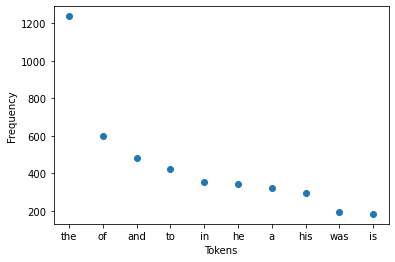

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

from nltk import FreqDist
fdist1 = FreqDist(tokens_T1)
list1 = fdist1.most_common() # Sorting based on frequency. List of tuple (word, freq)
xs = [] # Contains the words.
ys = [] # Contains the frequency of corresponding word.
for x, y in list1:
    xs.append(x)
    ys.append(y)
plt.scatter(xs[:10],ys[:10])
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.show()
# print(list1)

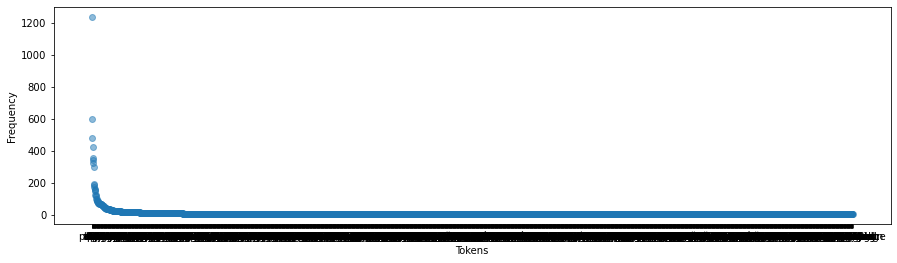

In [12]:
plt.figure(figsize=(15,4))
plt.scatter(xs,ys, alpha = 0.5)
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.show()

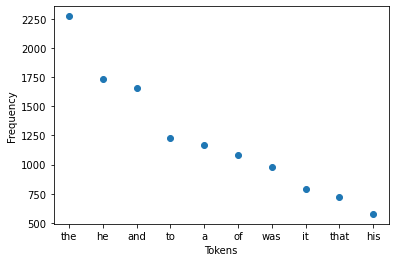

In [13]:
fdist2 = FreqDist(tokens_T2)
list2 = fdist2.most_common() # Sorting based on frequency. List of tuple (word, freq)
xs2 = []
ys2 = []
for x, y in list2:
    xs2.append(x)
    ys2.append(y)
plt.scatter(xs2[:10],ys2[:10])
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.show()
# print(list1)

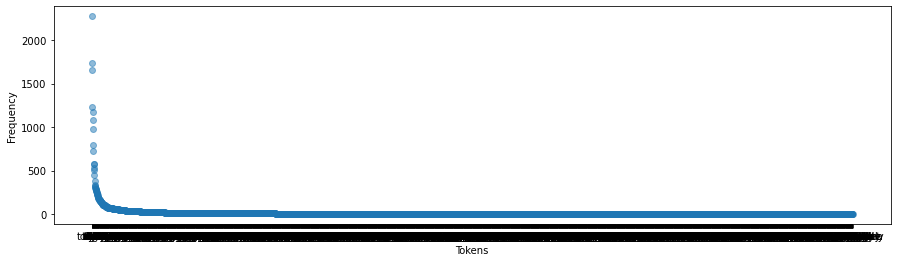

In [14]:
plt.figure(figsize=(15,4), )
plt.scatter(xs2,ys2, alpha = 0.5)
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.show()

### Removing STOP Words

In [15]:
def RemoveStopWords(text):
    tokens = word_tokenize(text)
    dict_stop_words = dict()
    stop_words = stopwords.words('english')
    
    without_stop=[]
    
    for i in tokens:
        if i not in stop_words:
            without_stop.append(i)
    
    return (without_stop)

In [16]:
Token_T1_without_stopwords = RemoveStopWords(T1_updated)
Token_T2_without_stopwords = RemoveStopWords(T2_updated)
print(len(Token_T1_without_stopwords))
print(Token_T1_without_stopwords[:100])
print(len(Token_T2_without_stopwords))
print(Token_T2_without_stopwords[:100])

7813
['\ufeffquestions', 'arouse', 'interest', 'man', 'dressed', 'armor', 'title', 'sir', 'tell', 'us', 'many', 'read', 'tennysons', 'poems', 'telling', 'story', 'knights', 'round', 'table', 'sir', 'galahad', 'look', 'think', 'starting', 'journey', 'rather', 'returning', 'one', 'think', 'must', 'important', 'journey', 'go', 'expected', 'knight', 'days', 'tell', 'good', 'deeds', 'would', 'judge', 'character', 'knight', 'represented', 'picture', 'walking', 'standing', 'still', 'looking', 'something', 'particular', 'lost', 'thought', 'appear', 'angry', 'meek', 'determined', 'hesitating', 'thoughtful', 'dreamy', 'clasped', 'hands', 'indicate', 'color', 'horse', 'upon', 'part', 'man', 'horse', 'light', 'fall', 'would', 'consider', 'main', 'thought', 'expressed', 'picture', 'original', 'picture', 'collection', 'alexander', 'henderson', 'mp', 'london', 'england', 'artist', 'george', 'frederick', 'watts', 'wŏts', 'birthplace', 'london', 'england', 'dates', 'born', '1817', 'died', '1904', 'stor

### PoS Tagging

In [17]:
from nltk.tag import pos_tag
from nltk.corpus import brown
tags_T1 = pos_tag(Token_T1_without_stopwords)
tags_T2 = pos_tag(Token_T2_without_stopwords)
print(len(tags_T1))
print(tags_T1[:100])
print(len(tags_T2))
print(tags_T2[:100])

7813
[('\ufeffquestions', 'NNS'), ('arouse', 'VBP'), ('interest', 'NN'), ('man', 'NN'), ('dressed', 'VBN'), ('armor', 'JJ'), ('title', 'NN'), ('sir', 'NN'), ('tell', 'VBP'), ('us', 'PRP'), ('many', 'JJ'), ('read', 'JJ'), ('tennysons', 'NNS'), ('poems', 'VBP'), ('telling', 'VBG'), ('story', 'NN'), ('knights', 'NNS'), ('round', 'NN'), ('table', 'NN'), ('sir', 'NN'), ('galahad', 'VBD'), ('look', 'NN'), ('think', 'VBP'), ('starting', 'VBG'), ('journey', 'NN'), ('rather', 'RB'), ('returning', 'VBG'), ('one', 'CD'), ('think', 'NN'), ('must', 'MD'), ('important', 'JJ'), ('journey', 'NN'), ('go', 'VBP'), ('expected', 'VBN'), ('knight', 'JJ'), ('days', 'NNS'), ('tell', 'VBP'), ('good', 'JJ'), ('deeds', 'NNS'), ('would', 'MD'), ('judge', 'VB'), ('character', 'NN'), ('knight', 'NN'), ('represented', 'VBD'), ('picture', 'NN'), ('walking', 'VBG'), ('standing', 'VBG'), ('still', 'RB'), ('looking', 'VBG'), ('something', 'NN'), ('particular', 'JJ'), ('lost', 'VBD'), ('thought', 'JJ'), ('appear', 'RB')

{'NNS': 912, 'VBP': 366, 'NN': 2486, 'VBN': 275, 'JJ': 1467, 'PRP': 32, 'VBG': 330, 'VBD': 566, 'RB': 474, 'CD': 127, 'MD': 112, 'VB': 210, 'IN': 156, 'JJS': 43, 'VBZ': 148, 'RP': 10, 'CC': 5, 'JJR': 23, 'RBS': 2, 'WDT': 4, 'WP$': 6, 'NNP': 6, 'RBR': 19, 'WRB': 5, 'DT': 19, 'FW': 10}


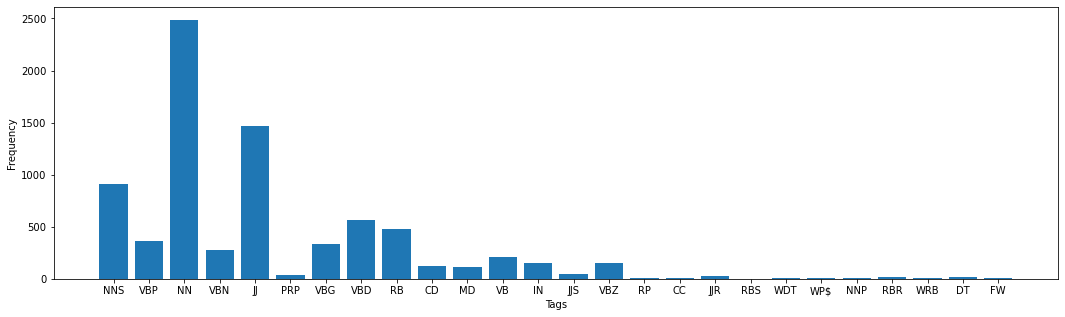

In [18]:
tags = []
for x, y in tags_T1:
    tags.append(y)

dict_T1 = dict(Counter(tags))
x_ = []
y_ = []
for key,val in dict_T1.items():
  x_.append(key)
  y_.append(val)
print(dict_T1)
plt.figure(figsize=(18,5))
plt.bar(x_, y_)
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.show()

{'NN': 6220, 'VBD': 2061, 'JJ': 4422, 'NNS': 1657, 'VBP': 739, 'RB': 1852, 'VBG': 918, 'IN': 453, 'VBN': 692, 'VB': 734, 'VBZ': 171, 'WRB': 6, 'DT': 106, 'MD': 436, 'RP': 36, 'JJR': 113, 'JJS': 137, 'PRP': 19, 'RBR': 68, 'RBS': 3, 'CC': 9, 'WP$': 3, 'FW': 4, 'NNP': 1, 'WDT': 6, 'WP': 4, 'CD': 6, 'UH': 5, 'EX': 3}


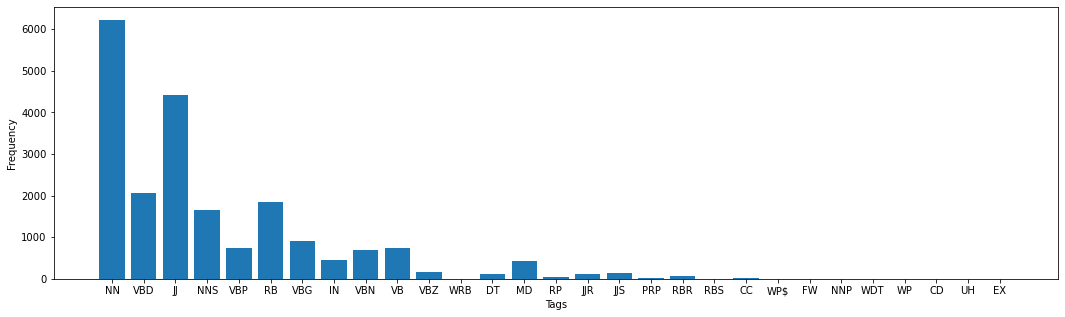

In [19]:
tags2 = []
for x, y in tags_T2:
    tags2.append(y)

dict_T2 = dict(Counter(tags2))
x_ = []
y_ = []
for key,val in dict_T2.items():
  x_.append(key)
  y_.append(val)
print(dict_T2)
plt.figure(figsize=(18,5))
plt.bar(x_, y_)
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:ylabel='count'>

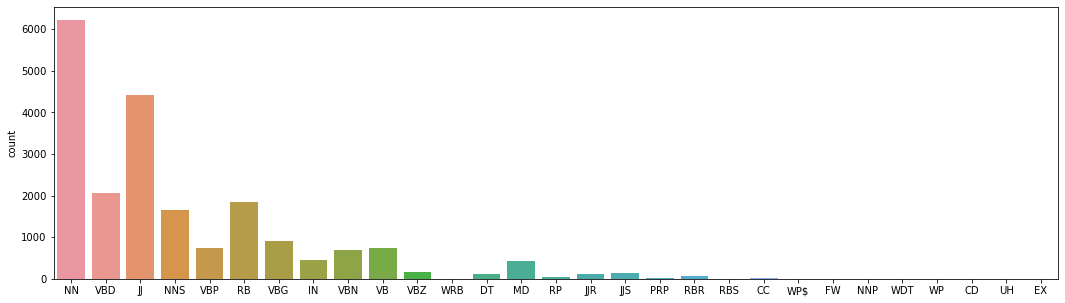

In [20]:
import seaborn as sns
list_xyz = []
for word, pos in tags_T2:
    list_xyz.append(pos)
plt.figure(figsize=(18,5))
sns.countplot(list_xyz)

## Named Entity Recognition

In [21]:
tags_T1[:10]

[('\ufeffquestions', 'NNS'),
 ('arouse', 'VBP'),
 ('interest', 'NN'),
 ('man', 'NN'),
 ('dressed', 'VBN'),
 ('armor', 'JJ'),
 ('title', 'NN'),
 ('sir', 'NN'),
 ('tell', 'VBP'),
 ('us', 'PRP')]

### a) Get Nouns and Verbs from both the books using PoS Tagging

In [22]:
# Empty lists which will contain the 'Verbs' and 'Nouns' from both the books.
NOUN_WORDS_T1 = []
VERB_WORDS_T1 = []
NOUN_WORDS_T2 = []
VERB_WORDS_T2 = []

In [23]:
# Appending the 'Verbs' and 'Nouns' into the lists created above.
for word, pos in tags_T1:
    if pos.startswith('N'):
        NOUN_WORDS_T1.append(word)
    if pos.startswith('V'):
        VERB_WORDS_T1.append(word)
for word, pos in tags_T2:
    if pos.startswith('N'):
        NOUN_WORDS_T2.append(word)
    if pos.startswith('V'):
        VERB_WORDS_T2.append(word)

### b) The categories that these words fall under in the WordNet. 

In [24]:
def Wordnet_categori(words, pos):
    list1 = []
    for word in words:
        if wordnet.synsets(word, pos=pos):
            list1.append(wordnet.synsets(word, pos=pos)[0].lexname()[5:])
        else:
            list1.append(None)
    return list1

In [25]:
NOUN_WORDS_T1_wordnet_categori = Wordnet_categori(NOUN_WORDS_T1[1:], wordnet.NOUN)
VERB_WORDS_T1_wordnet_categori = Wordnet_categori(VERB_WORDS_T1, wordnet.VERB)
NOUN_WORDS_T2_wordnet_categori = Wordnet_categori(NOUN_WORDS_T2[1:], wordnet.NOUN)
VERB_WORDS_T2_wordnet_categori = Wordnet_categori(VERB_WORDS_T2, wordnet.VERB)

#### PLOTS

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
order_noun = ['Tops', 'act', 'animal', 'artifact', 'attribute', 'body', 'cognition', 'communication', 'event', 'feeling',
              'food', 'group', 'location', 'motive', 'object', 'person', 'phenomenon', 'plant', 'possession', 'process',
              'quantity', 'relation', 'shape', 'state', 'substance', 'time']
order_verb = ['body', 'change', 'cognition', 'communication', 'competition', 'consumption', 'contact', 'creation',
              'emotion', 'motion', 'perception', 'possession', 'social', 'stative', 'weather']

#### 1. Frequency of NOUN words from book 1

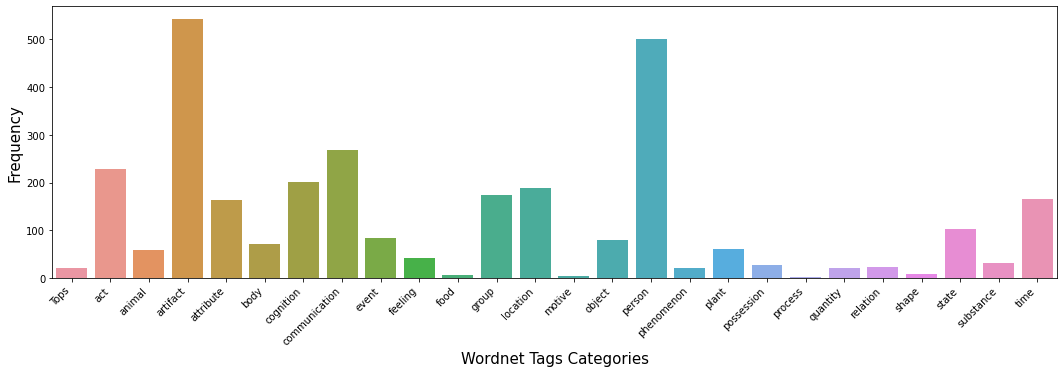

In [28]:
plt.figure(figsize=(18,5))
chart = sns.countplot(NOUN_WORDS_T1_wordnet_categori, order=order_noun)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Wordnet Tags Categories', size=15)
plt.ylabel('Frequency', size=15)
plt.show()

#### 2. Frequency of VERB words from book 1

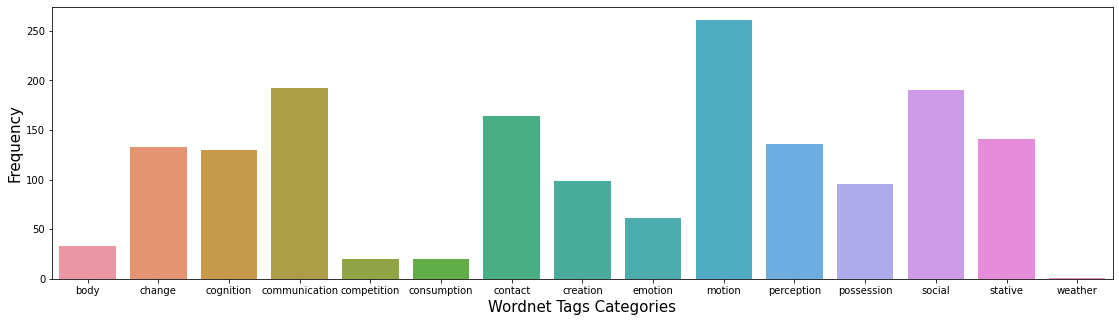

In [29]:
plt.figure(figsize=(19,5))
sns.countplot(VERB_WORDS_T1_wordnet_categori, order=order_verb)
plt.xlabel('Wordnet Tags Categories', size=15)
plt.ylabel('Frequency', size=15)
plt.show()

#### 3. Frequency of NOUN words from book 2

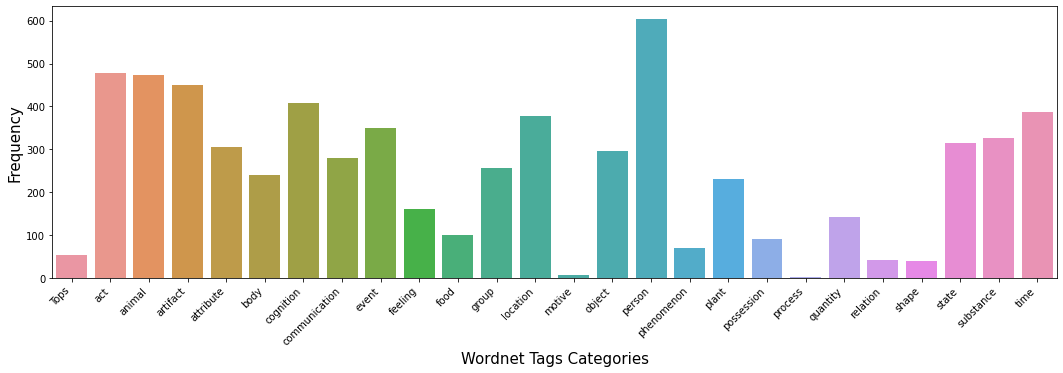

In [30]:
plt.figure(figsize=(18,5))
chart = sns.countplot(NOUN_WORDS_T2_wordnet_categori, order=order_noun)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Wordnet Tags Categories', size=15)
plt.ylabel('Frequency', size=15)
plt.show()

#### 4. Frequency of VERB words from book 2

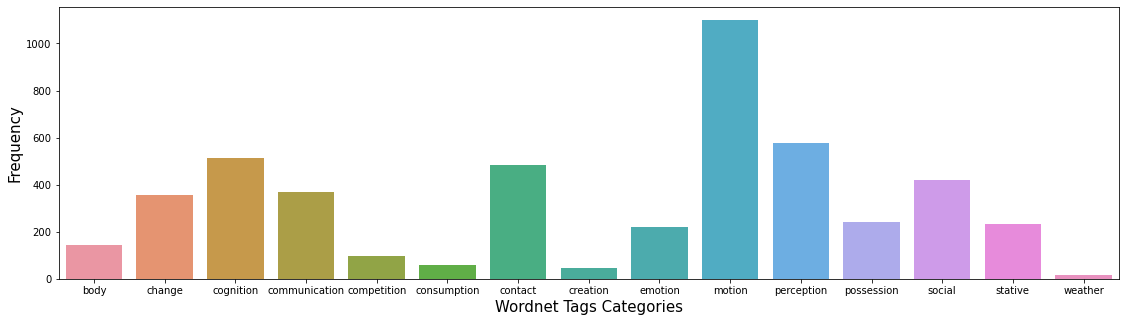

In [31]:
plt.figure(figsize=(19,5))
sns.countplot(VERB_WORDS_T2_wordnet_categori, order=order_verb)
plt.xlabel('Wordnet Tags Categories', size=15)
plt.ylabel('Frequency', size=15)
plt.show()

### Recognition of Persons, Location and Organisations from both book

In [32]:
import spacy
spacy.__version__

'2.3.5'

In [33]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [34]:
def NamedEntityRecognition(Text):
    doc = nlp(Text)
    list1 = []
    for ent in doc.ents:
        if ent.label_=='PERSON' or ent.label_=='ORG' or ent.label_=='LOC' or ent.label_=='GPE':
            list1.append((ent.text, ent.label_))
    return list1

In [35]:
NER_T1 = NamedEntityRecognition(T1_updated)
NER_T2 = NamedEntityRecognition(T2_updated)

In [36]:
len(NER_T1), len(NER_T2)

(159, 518)

In [37]:
# A sample output
NER_T1[0:10]

[('alexander henderson', 'PERSON'),
 ('london', 'GPE'),
 ('george frederick watts', 'PERSON'),
 ('london', 'GPE'),
 ('joseph', 'PERSON'),
 ('arimathæa', 'PERSON'),
 ('amfortas', 'PERSON'),
 ('king arthur', 'ORG'),
 ('george frederick watts', 'PERSON'),
 ('london', 'GPE')]

# Model Accuracy

This is a random text sample from the Novel

In [38]:
Test_sentence = 'The Holy Grail was the cup from which Christ drank at the Last Supper. It was bought from Pilate by\
 Joseph of Arimathæa, and placed in a castle where it was guarded night and day. It was passed on to\
 Joseph’s children, who received the charge in sacred trust, continuing to guard it faithfully. The\
 cup itself was most mysterious and wonderful. It could be seen only by those who were perfectly pure\
 in word, thought, and deed. If an evil person came near, it would seem to be borne away, completely\
 disappearing from view. The sight of it was as food and new life to the one to whom it was revealed,\
 and hence would enable him to live forever, make him very wise, and of course preserve him from death\
 in battle. But there was one thing it did not do,—it did not take away temptation to sin. No matter how\
 perfect the knight, he could still be tempted. He must continue to resist evil as long as he lived.\
 Then, too, when Sir Galahad came to the Round Table of King Arthur and his knights in Camelot, he found\
 them in the midst of a solemn meeting. Launcelot had just declared that according to prophecy a knight\
 should come that very day who should occupy the Siege Perilous. The Siege Perilous was a chair over which\
 the magician Merlin had cast a spell: only a stainless knight could sit in it without danger of instant\
 death. As Sir Galahad entered the room he was preceded by a strange old man, whom none had ever seen\
 before. Then the doors and windows quietly and mysteriously closed of their own accord, and the room was\
 filled with a strange light. These words, in letters of fire, appeared over the chair: “This is Galahad’s\
 seat.” By all these mysterious happenings the knights knew that Sir Galahad would be successful in finding\
 the Grail, and many accompanied him on his quest.'

#### For Manual Tagging Let's make an excel file for this sentence, where each word will be in a seperate row.

In [40]:
import pandas as pd
data = word_tokenize(Test_sentence)
df = pd.DataFrame(data)
df.head()

,0
0,The
1,Holy
2,Grail
3,was
4,the


In [41]:
writer = pd.ExcelWriter('Test_sentence.xlsx')
df.to_excel(writer)
writer.save()

In [42]:
Test_sentence

'The Holy Grail was the cup from which Christ drank at the Last Supper. It was bought from Pilate by Joseph of Arimathæa, and placed in a castle where it was guarded night and day. It was passed on to Joseph’s children, who received the charge in sacred trust, continuing to guard it faithfully. The cup itself was most mysterious and wonderful. It could be seen only by those who were perfectly pure in word, thought, and deed. If an evil person came near, it would seem to be borne away, completely disappearing from view. The sight of it was as food and new life to the one to whom it was revealed, and hence would enable him to live forever, make him very wise, and of course preserve him from death in battle. But there was one thing it did not do,—it did not take away temptation to sin. No matter how perfect the knight, he could still be tempted. He must continue to resist evil as long as he lived. Then, too, when Sir Galahad came to the Round Table of King Arthur and his knights in Camelo

In [44]:
data = pd.read_csv('Test_sentence.csv', encoding="ISO-8859-1", index_col=0)
data_frame = data.loc[(data.Tags=='PERSON') | (data.Tags=='ORG') | (data.Tags=='LOC') | (data.Tags=='GPE')]
data_frame = data_frame.reset_index().drop('index', axis=1)

In [45]:
data_frame

,Text,Tags
0,The,ORG
1,Holy,ORG
2,Grail,ORG
3,Christ,PERSON
4,Pilate,LOC
5,Joseph,PERSON
6,of,PERSON
7,Arimathæa,PERSON
8,Joseph,PERSON
9,Galahad,PERSON


#### Now for the same sentence we will use our Function

In [39]:
# Using our function on this.
NamedEntityRecognition(Test_sentence)

[('The Holy Grail', 'PERSON'),
 ('Pilate', 'ORG'),
 ('Joseph of Arimathæa', 'PERSON'),
 ('Joseph', 'PERSON'),
 ('Galahad', 'PERSON'),
 ('King Arthur', 'ORG'),
 ('Camelot', 'LOC'),
 ('Merlin', 'PERSON'),
 ('Galahad', 'PERSON'),
 ('Galahad', 'PERSON'),
 ('Galahad', 'PERSON'),
 ('Grail', 'PERSON')]

In [43]:
doc = nlp(Test_sentence)
list1 = list()
for X in doc:
    if  X.ent_type_=='PERSON' or X.ent_type_=='ORG' or X.ent_type_=='LOC' or X.ent_type_=='GPE':
        list1.append((X, X.ent_type_))
df = pd.DataFrame(list1, columns=['Text2', 'Tags2'])
df 

,Text2,Tags2
0,The,PERSON
1,Holy,PERSON
2,Grail,PERSON
3,Pilate,ORG
4,Joseph,PERSON
5,of,PERSON
6,Arimathæa,PERSON
7,Joseph,PERSON
8,Galahad,PERSON
9,King,ORG


#### Attaching both the dataframes side by side:

In [46]:
df2 = pd.concat((data_frame, df), axis=1)

In [47]:
df2

,Text,Tags,Text2,Tags2
0,The,ORG,The,PERSON
1,Holy,ORG,Holy,PERSON
2,Grail,ORG,Grail,PERSON
3,Christ,PERSON,Pilate,ORG
4,Pilate,LOC,Joseph,PERSON
5,Joseph,PERSON,of,PERSON
6,of,PERSON,Arimathæa,PERSON
7,Arimathæa,PERSON,Joseph,PERSON
8,Joseph,PERSON,Galahad,PERSON
9,Galahad,PERSON,King,ORG


We can see that here,
- 'The Holy Grail' is classified as PERSON but it is not a person, it is an ORG.
- 'Christ' is not classified but it is a person.
- 'Pilate' is classified as ORG but it is a LOC
- 'Joseph of Arimathæa' is correctly classified as a PERSON.
- 'Joseph' is correctly classified as a PERSON.
- 'Galahad is correctly classified as a PERSON.
- 'King Aurthur' is incorectly classified as an ORG but it is a PERSON.
- 'Camelot' is correctly classified as a LOC.
- 'Launcelot' is not classified, but it is a PERSON.
- 'Merlin' is correctly classified as a PERSON.
- 'Galahad' is correctly classified as a PERSON multiple times.
- 'Grail' is correctly classified as a PERSON.

In [48]:
data.shape

(375, 2)

In [49]:
(357-19), ((338+11)/357*100), (11/19*100)

(338, 97.75910364145658, 57.89473684210527)

Total words we have in our Test_Sentence = 357
Words having tags as 'PERSON', 'LOC', 'GPE', 'ORG' = 19
Other words = 357-19 = 338
Words Correctly classified having tags as 'PERSON', 'LOC', 'GPE', 'ORG' = 11

Accuracy according to the whole Test data = (338+11)/357*100 = 97.759%

Accuracy according to only tags specified as 'PERSON', 'LOC', 'GPE', 'ORG' = 11/19*100 = 57.894%

## Named Entity Relationship

In [61]:
from spacy import displacy

#### Book 1

In [64]:
# only plotting for top 1000 words
doc = nlp(T1_updated[:1000])
displacy.render(doc, style='dep', jupyter=True, options={'distance':150})

In [68]:
doc = nlp(T1_updated[:10000])
displacy.render(doc, style='ent', jupyter=True)

#### Book 2

In [65]:
doc = nlp(T2_updated[:1000])
displacy.render(doc, style='dep', jupyter=True, options={'distance':150})

In [70]:
doc = nlp(T2_updated[:10000])
displacy.render(doc, style='ent', jupyter=True)

In [69]:
len(T1_updated)

87121